# Identifying molecular features for human IDR function using FAIDR method
*Gang Peng*



<br>


## Zscore-molecular feature T stats plot

The FAIDR method aimed at Identify molecular features that associated with protein function and IDR that responsible for protein function.

The logistic regression part used in the method, use molecular feature to predict function:

$$ P(Y=1 |Z,b) = \frac{1}{1+e^{-Z_{ij}b}}=1-P(Y=0|Z,b)$$

In the model, the molecular features are characterized by the Z-scores, the evolutionary signatures.

The results of the algorithm, include a Tstats file that select molecular features associated with certain GO terms.

We then expecting these Tstats for molecular feature coeffcients correlated with the Zscores that intended to be predictor of IDR function.
 
If we plot these Zscores with the Tstats, then we can produce a scatter plot similar to the plot in the [paper](https://www.biorxiv.org/content/10.1101/2020.06.23.167361v1), I call it ZFplot.

I wrote a module that can generate a plot for every IDR and every annotation in the dataset. First use it on a most common protein with IDR in it.

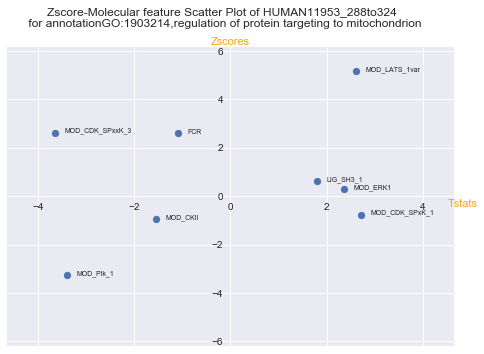

In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.getcwd())
from zfplot import*

idx = getindex_cid('p53')
plot_scatter(1, idx[1]);

HUMAN11953_288to324, is one of the two IDRs on protein products of p53.

The X axis is the  T stats of molecular feature coefficient b from the algorithm output. We only interested in the T statisitics because for the regression only coeffcients with significance above some threshold should be considered. Here only molecular features with non-zero T statistics have been showed.

The Y axis is the Zscores, corresponding to features picked from T stats.

The plot shows some molecular fearures have **non-zero Tstas**, and corresponding Zscores for these features are ploted. I didn't use any hard treshold for the Tstats value.

Generally, data points in quardrant 1 and 3 shows Tstats and ZScores are positively correlated.

But the intepretation is tricky as both the Tstats output and Zscores are not straitforward simple measures. Tstats outputs are after the coefficients were subjected to *L1 penalty*, Zscores are measure of molecular features deviate from (positively or negatively) null expectation of evolution.

We don't want the model to use everything to explain everything, only select some covariates.

Below is ZFplot of another IDR on the same protein of p53, with a different annotation: 


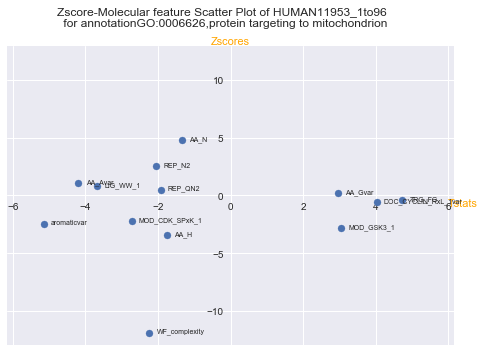

In [2]:
plot_scatter(2, idx[0])

Zscores are at IDR level, but the Tstat output from the FAIDR algorithm is for whole IDR dataset result from some annotation output. The protein P04637 (of p53) is actually not annotated to the two GO terms showed above. 

In [3]:
ann = pd.read_csv('./arv/mitTarg.csv')
ann.iloc[idx[0],:]

idr_name                                                                HUMAN11953_1to96
NAME                                                                              P04637
GO:1903214,regulation of protein targeting to mitochondrion                            0
GO:0006626,protein targeting to mitochondrion                                          0
GO:0006613,cotranslational protein targeting to membrane                               0
GO:1903955,positive regulation of protein targeting to mitochondrion                   0
GO:0005739,mitochondrion                                                               0
GO:0005743,mitochondrial inner membrane                                                0
GO:0005759,mitochondrial matrix                                                        0
GO:0035556 intracellular signal transduction                                           1
GO:0005741,mitochondrial outer membrane                                                0
GO:0005740,mitochondr

p53 protein is annotated to GO:0035556 intracellular signal transduction', but **this GO term actually does not have any non-zero Tstats in the output**, our result is generated using mainly mitochondria related annotations, so it is not helping in finding functions of p53 is not surprising. 

Interestingly, GO:0035556 also does not have any non-zero Tstats in the output of SPOTd dataset running.

In [4]:
tstats = pd.read_csv('./arv/Tstats_mitHuman_lam03.csv')
tstats.iloc[:,8]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
141   NaN
142   NaN
143   NaN
144   NaN
145   NaN
Name: GO.0035556.intracellular.signal.transduction, Length: 146, dtype: float64

For every IDRs and every annotations we could produce a ZFplot, as every annotation generate a column of Tstats for picking the molecular features that related to the annotation, and every IDR has Zscore for every molecular features, but user should be cautious in interpretation as the IDR may not annotated for the GO term.

When displaying on website, one option is for an IDR, only those GO terms annotated to this IDR, generate a ZFplot.

### ZFplots for IDRs acutally annotated to the GO terms
For IDRs that actually annotated to the GO terms, we can find more interesting hypothesis. 

For example UniProtKB - Q6IN84 (MRM1_HUMAN) is "rRNA methyltransferase 1, mitochondrial", and is annotated to mitochondrial matrix and mitochondrion.

In [5]:
idx2 = getindex_sid('Q6IN84')
ann.iloc[idx2[0],:]

idr_name                                                                HUMAN12463_1to43
NAME                                                                              Q6IN84
GO:1903214,regulation of protein targeting to mitochondrion                            0
GO:0006626,protein targeting to mitochondrion                                          0
GO:0006613,cotranslational protein targeting to membrane                               0
GO:1903955,positive regulation of protein targeting to mitochondrion                   0
GO:0005739,mitochondrion                                                               1
GO:0005743,mitochondrial inner membrane                                                0
GO:0005759,mitochondrial matrix                                                        1
GO:0035556 intracellular signal transduction                                           0
GO:0005741,mitochondrial outer membrane                                                0
GO:0005740,mitochondr

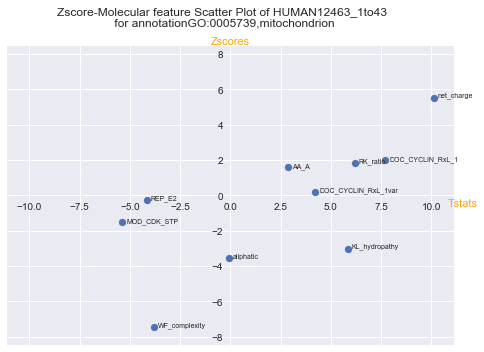

In [6]:
plot_scatter(5,idx2[0])

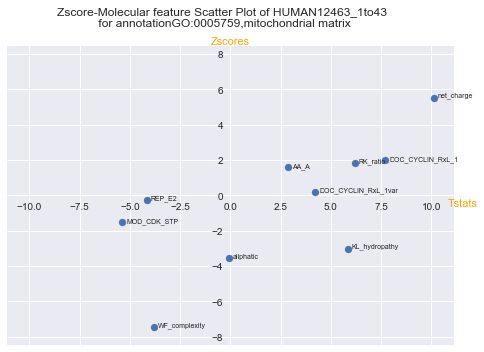

In [7]:
plot_scatter(7, idx2[0])

Both plot show 'net charge' is responsible for the annotation, and Zscore of this IDR is positively correlated. All other data points in the above two plots looks like the same, that's because the **Tstats columns for the two GO terms are exactly the same:**

In [8]:
tstats.iloc[0:10,5:8]

,GO.0005739.mitochondrion,GO.0005743.mitochondrial.inner.membrane,GO.0005759.mitochondrial.matrix
0,NaN,NaN,NaN
1,10.108819,1.035493,10.108819
2,2.859010,NaN,2.859010
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [9]:
tstats.iloc[73:83,5:8]

,GO.0005739.mitochondrion,GO.0005743.mitochondrial.inner.membrane,GO.0005759.mitochondrial.matrix
73,6.195020,4.831089,6.195020
74,NaN,NaN,NaN
75,-0.076923,1.754475,-0.076923
76,NaN,NaN,NaN
77,NaN,NaN,NaN
78,NaN,NaN,NaN
79,NaN,NaN,NaN
80,5.850884,4.306138,5.850884
81,NaN,1.013024,NaN
82,NaN,NaN,NaN


The reason for this might be 'mitochondrion' and 'mitochondrial.matrix' annotate to the same or almost the same IDRs in our dataset.

For another example, UniProtKB - Q96AQ8 (MCUR1_HUMAN) is 'Mitochondrial calcium uniporter regulator 1'. The IDR is annotated to mitochondrial inner memberane, and the ZFplot also looks very nice.

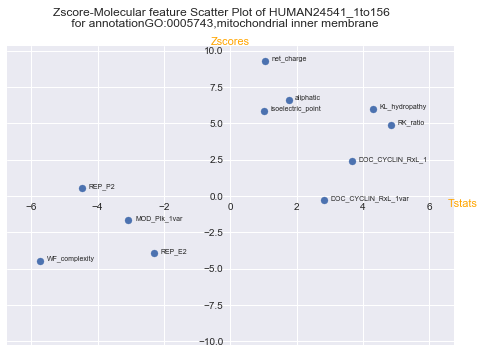

In [10]:
idx3 = getindex_sid('Q96AQ8')
plot_scatter(6, idx3[0])

These plots are very helping in identifying molecular features associated with the annotation, and consistant with high Zscores (appears to be simultaneously positive or negative).

Since the model is based on regression on Zscores, so based on the intention of the algorithm, **Zscore and Tstats should be positively correlated**.

Another example for 'NADH dehydrogenase [ubiquinone] iron-sulfur protein 3, mitochondrial'(UniProtKB - O75489 (NDUS3_HUMAN)):

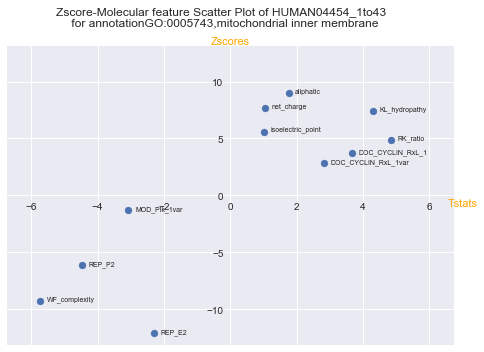

In [11]:
idx4 = getindex_sid('O75489')
plot_scatter(6, idx4[0])

In [12]:
ann.iloc[idx4[0],:]

idr_name                                                                HUMAN04454_1to43
NAME                                                                              O75489
GO:1903214,regulation of protein targeting to mitochondrion                            0
GO:0006626,protein targeting to mitochondrion                                          0
GO:0006613,cotranslational protein targeting to membrane                               0
GO:1903955,positive regulation of protein targeting to mitochondrion                   0
GO:0005739,mitochondrion                                                               1
GO:0005743,mitochondrial inner membrane                                                1
GO:0005759,mitochondrial matrix                                                        1
GO:0035556 intracellular signal transduction                                           0
GO:0005741,mitochondrial outer membrane                                                0
GO:0005740,mitochondr

### Comparing Human disopred3 and SPOTd results

The two IDR prediction algorithm disopred3 and SPOTd give similar but different results of IDR prediction, also the evolutionary signatures in the two dataset have some differences.

For comparision I used the same annoatation data that annotate same GO terms to same protein which have IDRs in them as predicted by both prediction algorithms. 

After running our FAIDR codes on the SPOTd evolutionary signature and annotation dataset, we can compare the results. 

The previously plotted 'NADH dehydrogenase [ubiquinone] iron-sulfur protein 3, mitochondrial':methyltransferase 1"(UniProtKB - O75489 (NDUS3_HUMAN)), has IDR predicted by both  disopred3 and SPOTd.

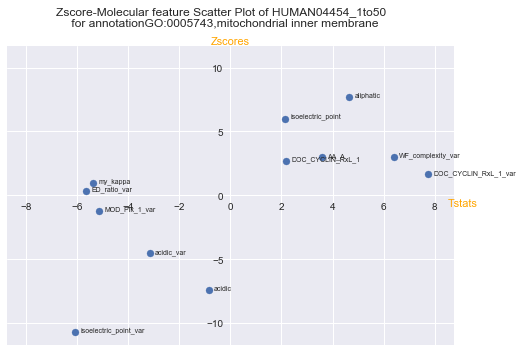

In [13]:
idx5=getindex_sid('O75489', dataset=2)
plot_scatter(6, idx5[0], dataset=2)

The plots and the molecular features picked by the results are similar, with some minor diffenrences. Both selected aliphatic and isoelectric point, but SPOTd result does not include net charge.

AS another example, ["UniProtKB - P21912 (SDHB_HUMAN)"](https://www.uniprot.org/uniprot/P21912), Succinate dehydrogenase [ubiquinone] iron-sulfur subunit, mitochondrial, has IDR in it predicted by both algorithms.

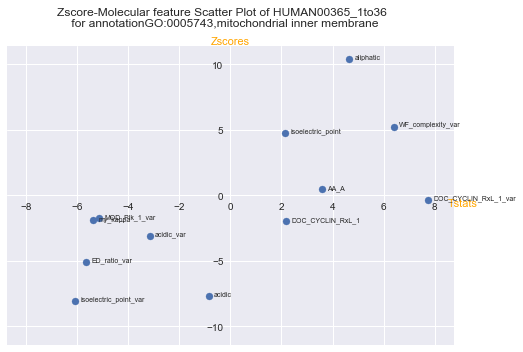

In [14]:
idx6=getindex_sid('P21912', dataset=2)
plot_scatter(6, idx6[0], dataset=2)

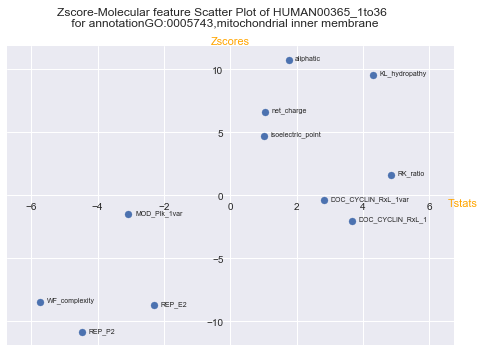

In [15]:
idx7=getindex_sid('P21912')
plot_scatter(6, idx7[0])

The plots are very similar and similar to plot of [NDUS3, NADH dehydrogenase [ubiquinone] iron-sulfur protein 3](https://www.uniprot.org/uniprot/O75489), the two proteins should be closely related (involved in mitochondrial membrane respiratory chain Complex I and complex 2 respectively).

The plots give hypothesis that aliphatic, isoelectric point, WF complexity(and its variance) are responsible for the annotation mitochondria inner membrane.

### IDR similarity specific to function (annotation)

Interestingly, although NDUS3 and SDHB are closely related and have similar ZFplots, in our website, the two protein are not in the top10 "similar IDR" list of each other:

![simiidr](./arv/simiidr.png)

Their IDR profile plots looks not very similar:

![proNDUS3](./arv/proNDUS3.png)

![proSDHB](./arv/proSDHB.png)


When we calculate the similar IDR list, we use the whole set of Zscore values of IDRs for comparison. 

But sometimes only use a subset of the Zscores maybe more relevent, and the FAIDR algorithm output select the subset for us, only molecular features that have non-zero Tstatas are used.

This is the IDR similarity based on specific annotations. In this sense NDUS3 and SDHB are similar specific to the mitochondria inner membrane annotation.

## Comparing Human and Yeast results

For the comparision we need select some Yeast protein homologs which have IDRs in them as predicted by the IDR prediction algorithm.

The previously plotted UniProtKB - Q6IN84 (MRM1_HUMAN) has a Yeast homolog UniProtKB - P25270 (MRM1_YEAST, rRNA methyltransferase 1, mitochondrial). Both proteins have IDR in our dataset.

To compare to the Yeast result, first I make sure the input for the FAIDR algorithm is based on same annotation dataset. So I compiled a dataset with the same GO terms related to all the IDRs in Yeast dataset.

In [16]:
ann_yeast = pd.read_csv('./data/mitTarg_yeast.csv')
ann_yeast.iloc[:10,:]

,idr_name,NAME,"GO:0005654,nucleoplasm","GO:0005730,nucleolus","GO:0005739,mitochondrion","GO:0005740,mitochondrial envelope","GO:0005741,mitochondrial outer membrane","GO:0005758,mitochondrial intermembrane space","GO:0031966,mitochondrial membrane","GO:0035556,intracellular signal transduction","GO:0051646,mitochondrion localization","GO:0051654,establishment of mitochondrion localization","GO:0098573,intrinsic component of mitochondrial membrane","GO:0098798,mitochondrial protein complex","GO:0098799,outer mitochondrial membrane protein complex"
0,YAL001C_idr_2,TFC3,1,0,1,0,0,0,0,0,0,0,0,0,0
1,YAL001C_idr_3,TFC3,1,0,1,0,0,0,0,0,0,0,0,0,0
2,YAL001C_idr_5,TFC3,1,0,1,0,0,0,0,0,0,0,0,0,0
3,YAL002W_idr_1,VPS8,0,0,0,0,0,0,0,0,0,0,0,0,0
4,YAL009W_idr_1,SPO7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,YAL010C_idr_2,MDM10,0,0,0,0,1,1,1,0,1,1,1,1,1
6,YAL011W_idr_1,SWC3,0,0,1,0,0,0,0,0,0,0,0,0,0
7,YAL011W_idr_3,SWC3,0,0,1,0,0,0,0,0,0,0,0,0,0
8,YAL011W_idr_4,SWC3,0,0,1,0,0,0,0,0,0,0,0,0,0
9,YAL013W_idr_1,DEP1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
idx8 = getindex_sid("YOR201C", dataset=1)
ann_yeast.iloc[idx8[0],:]

idr_name                                                    YOR201C_idr_1
NAME                                                                 MRM1
GO:0005654,nucleoplasm                                                  0
GO:0005730,nucleolus                                                    0
GO:0005739,mitochondrion                                                1
GO:0005740,mitochondrial envelope                                       0
GO:0005741,mitochondrial outer membrane                                 0
GO:0005758,mitochondrial intermembrane space                            0
GO:0031966,mitochondrial membrane                                       0
GO:0035556,intracellular signal transduction                            0
GO:0051646,mitochondrion localization                                   0
GO:0051654,establishment of mitochondrion localization                  0
GO:0098573,intrinsic component of mitochondrial membrane                0
GO:0098798,mitochondrial protein compl

After running the R code on this annotation dataset, and obtain Tstats for the yeast IDRs, we can generate ZFplots for the IDR.

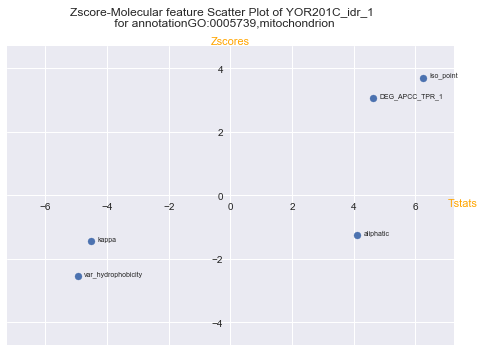

In [18]:
plot_scatter(1, idx8[0], dataset=1);

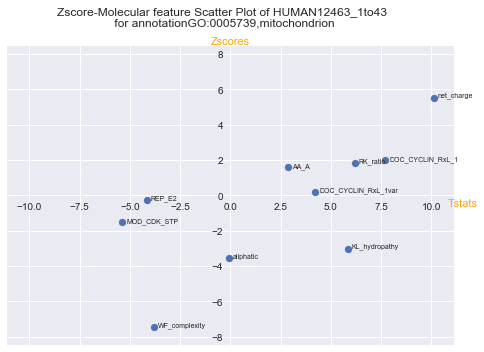

In [19]:
plot_scatter(5,idx2[0], dataset=0)

Compare to its human homolog, the ZFplots are quite different. For example here 'ISO_point' is selected instead of 'net charge' in the MRM1_HUMAN plot.

The differences may arise from the Tstats output selected different molecular features in Human and Yeast datasets.

We can directly compare the Tstats of the two results.


In [20]:
compare = pd.read_csv('./data/compare_features.csv')
compare.iloc[:15,:5]

,Yeast features,GO.0005739.mitochondrion,GO.0005740.mitochondrial.envelope,GO.0005758.mitochondrial.intermembrane.space,GO.0098798.mitochondrial.protein.complex
0,mean_AA_A,NaN,NaN,NaN,NaN
1,mean_AA_G,NaN,NaN,NaN,NaN
2,mean_AA_H,NaN,NaN,NaN,NaN
3,mean_AA_N,NaN,NaN,-0.918092,NaN
4,mean_AA_P,NaN,NaN,NaN,NaN
5,mean_AA_Q,NaN,NaN,NaN,NaN
6,mean_AA_S,NaN,60.567817,NaN,NaN
7,mean_AA_T,NaN,24.065456,NaN,NaN
8,mean_acidic,NaN,NaN,NaN,NaN
9,mean_aliphatic,4.112394,NaN,-0.293291,NaN


In [21]:
compare.iloc[:15,5:]

,Human_disopred3 features,GO.0005739.mitochondrion lam=0.3,GO.0005739.mitochondrion lam=0.2,GO.0005740.mitochondrial.envelope lam=0.3,GO.0005740.mitochondrial.envelope lam=0.2,GO.0005758.mitochondrial.intermembrane.space lam=0.3,GO.0005758.mitochondrial.intermembrane.space lam=0.2,GO.0098798.mitochondrial.protein.complex lam=0.3,GO.0098798.mitochondrial.protein.complex lam=0.2
0,FCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,net_charge,10.108819,7.892404,6.038520,4.281956,NaN,NaN,-0.762039,NaN
2,AA_A,2.859010,4.097111,NaN,NaN,2.706145,2.772142,NaN,0.881359
3,AA_G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AA_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AA_P,NaN,-1.835427,NaN,NaN,NaN,NaN,NaN,NaN
7,AA_Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AA_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.774581
9,AA_T,NaN,NaN,NaN,NaN,NaN,-0.286931,NaN,NaN


In [22]:
compare.iloc[15:30,:]

,Yeast features,GO.0005739.mitochondrion,GO.0005740.mitochondrial.envelope,GO.0005758.mitochondrial.intermembrane.space,GO.0098798.mitochondrial.protein.complex,Human_disopred3 features,GO.0005739.mitochondrion lam=0.3,GO.0005739.mitochondrion lam=0.2,GO.0005740.mitochondrial.envelope lam=0.3,GO.0005740.mitochondrial.envelope lam=0.2,GO.0005758.mitochondrial.intermembrane.space lam=0.3,GO.0005758.mitochondrial.intermembrane.space lam=0.2,GO.0098798.mitochondrial.protein.complex lam=0.3,GO.0098798.mitochondrial.protein.complex lam=0.2
15,mean_DEG_APCC_TPR_1,4.622780,55.042501,0.719323,5.384780,DOC_PP2A_B56_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,mean_disorder_promoting,NaN,NaN,NaN,NaN,DOC_PP2B_PxIxI_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,mean_DOC_CKS1_1,NaN,NaN,0.791014,NaN,INT_RGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,mean_DOC_MAPK_DCC_7,NaN,-8.388333,NaN,-0.220495,LIG_14.3.3_CanoR_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,mean_DOC_MAPK_gen_1,NaN,21.488100,NaN,-4.022666,LIG_AP_GAE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,mean_DOC_MAPK_HePTP_8,NaN,NaN,NaN,NaN,LIG_CaM_IQ_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,mean_DOC_PP1_RVXF_1,NaN,49.629385,1.069346,NaN,LIG_EH_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,mean_DOC_PP2B_PxIxI_1,NaN,NaN,NaN,NaN,LIG_EVH1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,mean_DOC_PRO,NaN,-28.951443,NaN,NaN,LIG_LIR_Gen_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,mean_ED_ratio,NaN,NaN,NaN,NaN,LIG_NRBOX,NaN,NaN,NaN,NaN,NaN,-1.944041,NaN,-2.73989


If the results are consistant, then not only proves the FAIDR method can consistantly associate molecular features with functions across different species dataset, it also further proves that evolutonary signature correctly summarized the deciding molecular features that are significent to function.

But this task is challenging. For starter, human and yeast dataset use different sets of moleclular features. We could for this comprison purpose, use same set of molecular features for human and yeast, but that needs recalculate all the Zscores based on new molecular features. I don't know why these molecular features were selected in original calculation,to begin with.

The result also influenced by the alogrithm of IDR prediction. For example there is IDR predicted in yeast COX15, but both disopred3 and SPOTd predict there is no IDR in human COX15 ( UniProt Q7KZN9), do we have reasons to believe that?

For more comparison of the results of different dataset, I added the ZFplot part on the website.

